In [52]:
import os
os.getcwd()

'/home/sapatevaibhav/Documents/ML'

In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('sheets/SMSSpamCollection', sep='\t', names =['tag','data']);

In [6]:
df

,tag,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sapatevaibhav/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
from nltk.corpus import stopwords
swords = stopwords.words('english')
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize

In [22]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word for word in tokens
            if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean
            if word not in swords]
    return clean

In [17]:
tfidf = TfidfVectorizer(analyzer = clean_text)

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/sapatevaibhav/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
x = df['data']
y = df['tag']
x_new = tfidf.fit_transform(x)

In [28]:
x.shape

(5572,)

In [29]:
x_new.shape

(5572, 6513)

In [30]:
x_new

<5572x6513 sparse matrix of type '<class 'numpy.float64'>'
	with 52578 stored elements in Compressed Sparse Row format>

In [31]:
y.value_counts()

ham     4825
spam     747
Name: tag, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y , random_state = 0, test_size = 0.25)

In [35]:
from sklearn.naive_bayes import GaussianNB

In [37]:
nb = GaussianNB()

In [38]:
nb.fit(x_train.toarray(), y_train)

GaussianNB()

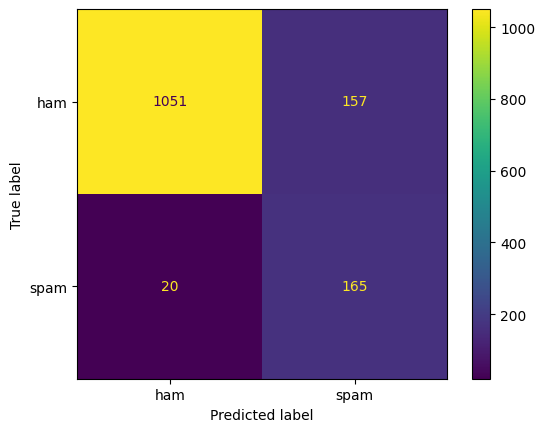

In [39]:
y_pred = nb.predict(x_test.toarray())
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);

In [41]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 0)

In [43]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

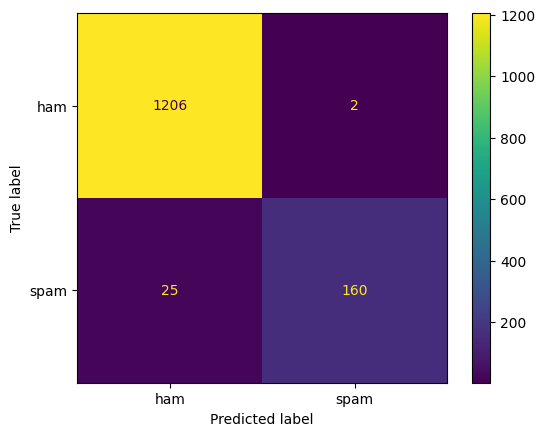

In [44]:
y_pred = rf.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.86      0.92       185

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [46]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)
accuracy_score(y_test, y_pred)


0.9641062455132807

In [47]:
from sklearn.model_selection import GridSearchCV
params ={
        'criterion': ['gini','entropy'],
        'max_features': ['sqrt','log2'],
        'random_state': [0,1,2,3,4],
        'class_weight': ['balanced', 'balanced_subsample']
}

In [48]:
grid = GridSearchCV(rf, param_grid = params, cv = 5, scoring = 'accuracy')

In [49]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 2, 3, 4]},
             scoring='accuracy')

In [50]:
rf = grid.best_estimator_

In [51]:
y_pred = rf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9777458722182341